In [1]:
from intent_matching import matching
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
_PATH_DATA = '../data'
_PATH_TEST_B = os.path.join(_PATH_DATA,'test_b.csv')
_PATH_TEST_A = os.path.join(_PATH_DATA,'test_a.csv')
_PATH_INTENT = os.path.join(_PATH_DATA,'intent.json')

In [3]:
dict_intent = json.load(open(_PATH_INTENT,'r'))
dict_intent.keys()

dict_keys(['overview', 'symptoms', 'main_type', 'risk_factor', 'severe', 'prevention', 'diag', 'treatment'])

In [4]:
df_test = pd.read_csv(_PATH_TEST_B)
df_test.head()

,question,intent,annotate
0,"Chào bác sĩ ạ, gần đây em có đọc được một thôn...",overview,không nên truyền máu nếu có quan hệ huyết thốn...
1,"Thưa bác sĩ, gần đây trên mạng xã hội có truyề...",overview,Vậy bác sĩ cho tôi hỏi nên ăn hoa quả trước ha...
2,"Thưa Bác sỹ, theo tôi được biết hiện tại đang ...","symptom, treatment",Vậy Bác sỹ có thể cho tôi biết các dấu hiệu củ...
3,"Thưa bác sĩ, thời tiết đang chuyển sang mù...","risk_factor, symptom","Vào mùa này, trẻ thường dễ mắc những bện..."
4,"Cho E xin tư vấn về vi rút HPV, và có thể điều...","overview, treatment","Cho E xin tư vấn về vi rút HPV, và có thể điều..."


In [5]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [6]:
dict_invest = {}
## init dict_invest
for k in list(dict_intent.keys()):
    dict_invest[k] = 0


In [7]:
list_sentence = list(df_test['annotate'])
list_label = list(df_test['intent'])
list_label = [item.split(',') for item in list_label]

In [8]:
list_threshold = np.arange(0.5,1, 0.05).tolist()
# list_threshold
list_f1 = []

In [9]:
## config type calculate edit distance

type_dist = 'token_set'

In [10]:
for threshold in list_threshold:

    list_matching = []
    # count = 0
    list_investigate = []
    list_precision = []
    list_recall = []
    for idx, sent in tqdm(enumerate(list_sentence), total = len(list_sentence)):

        ## investigate threshold

        dict_matching = matching(str(sent),threshold,type_dist)
        list_res_match = dict_matching['intent']
        list_investigate.append(dict_matching)
        res_match = [item[0] for item in list_res_match]

        list_labeling = [l.replace(':','') for l in list_label[idx]]

        intersect = intersection(res_match,list_labeling)

        ## define TP,FP,FN
        TP = len(intersect)

        FP = len(list(set(res_match) - set(list_labeling)))
        precision = TP/(TP+FP)
        list_precision.append(precision)

        FN = len(list(set(list_labeling) - set(res_match)))
        recall = TP/(TP+FN)
        list_recall.append(recall)


        precision_mean = np.mean(list_precision)
        recall_mean = np.mean(list_recall)
        f1_score = 2*(precision_mean*recall_mean)/(precision_mean+recall_mean)
    list_f1.append(f1_score)

100%|██████████| 236/236 [00:07<00:00, 30.77it/s]


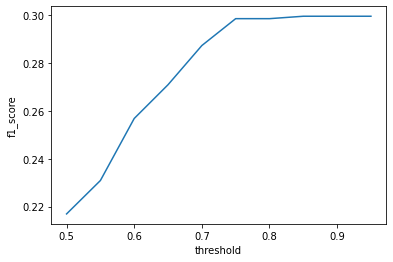

In [11]:
plt.plot(list_threshold,list_f1)

plt.xlabel('threshold')
plt.ylabel('f1_score')
plt.show()

In [12]:
# list_f1

In [13]:
# df_investigate = pd.DataFrame(list_investigate)
# df_investigate

In [14]:
# df_investigate['true_intent'] = list_label
# df_investigate['precision'] = list_precision
# df_investigate['recall'] = list_recall

In [15]:
# df_investigate

In [16]:
# list_fine_precision = []
# for item in list_precision:
#     if item != 'none':
#         list_fine_precision.append(item)

In [17]:
df_investigate.to_csv(os.path.join(_PATH_DATA,'test_b_investigate.csv'),header=True,index=False)

NameError: name 'df_investigate' is not defined